학습한 모델이 쓸모가 있는 지 확인 하기 위해서 모델 평가를 수행해야 합니다. 모델을 평가한다고 하면 `정확도`라는 단어를 떠올리기 쉬운데, 문제에 따라 단순히 정확도로만 평가하기 힘든 경우가 있습니다. 조금 더 알아보면 민감도, 특이도, 재현율 등의 용어가 나오는데, 비전공자에게는 생소하게만 느껴집니다. 몇가지 문제와 모델을 정의하고 여기에 적합한 평가 기준이 무엇인지 알아보겠습니다. 용어는 생소하지만 그 의미를 알게되면 왜 이런 기준이 필요한 지 감이 오실겁니다. 보통 평가에 관련된 내용을 보면 표와 수식이 많은 편인데, 손가락만 있으면 계산할 수 있도록 간단한 블록 놀이와 함께 알아보겠습니다.

---

### 분류 하기

자 그럼 첫번째 문제입니다.

    아래 레고 블록 중 상단 돌기의 수가 홀수인 것을 골라 왼쪽으로 놔두고, 짝수는 오른쪽으로 놔두세요.
    
어린아이들도 쉽게 풀 수 있는 문제입니다. 총 10개 중 홀수와 짝수는 몇 개 일까요?

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_1.jpg)

홀수가 4개, 짝수가 6개 있습니다. 조금 더 눈썰미가 좋으신 분은 홀수가 녹색, 짝수가 노란색으로 되어 있는 지 알아차렸을겁니다. 색상은 쉽게 구분이 되도록 맞춘 것뿐이고 문제하고는 상관이 없으니 신경쓰지 않으셔도 됩니다. 우리가 평가할 모델이 여섯 개이고, 각 모델의 결과가 다음과 같다고 가정해봅시다.

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_2.png)

어떤 모델의 결과가 가장 좋을까요? 정답은 A모델입니다. 홀수 블록과 짝수 블록을 정확하게 구분하고 있습니다. 그럼 다음으로 좋은 모델은 무엇일까요? 각 모델 결과의 특징을 보겠습니다.
- B모델 : 모두 홀수로 분류
- C모델 : 모두 짝수로 분류
- D모델 : 홀수라고 분류한 것에는 홀수만 있지만, 일부 홀수를 놓침
- E모델 : 짝수라고 분류한 것에는 짝수만 있지만, 일부 짝수를 놓침
- F모델 : 홀짝이 모두 섞여있음
일단 우리가 흔히 말하면 정확도로 평가를 해보겠습니다.

#### 정확도

`정확도`란 전체 개수 중 홀수를 홀수라고 맞추고(양성을 양성이라 말하고), 짝수를 짝수라고 맞춘(음성을 음성이라고 말한) 개수의 비율입니다. B모델은 전체 10개 중에 홀수 블록 4개만 맞추었으므로 정확도는 40%입니다. C모델은 전체 10개 중에 짝수 블록 6개만 맞추었으므로 정확도가 60%입니다. 무조건 한 쪽으로 분류하더라도 클래스의 분포에 따라 높게 나올 수 있습니다. 만약 남자고등학교에서 남녀를 구분하는 모델을 개발한다고 했을 때, 그 모델이 무조건 남자인 결과를 내놓는다고 가정해봅시다. 실제 여자가 있더라고 모두 남자라고 분류를 하겠지만 정확도는 90%가 넘을 겁니다. 그렇다고 이 모델이 좋다고는 할 수 없습니다.

    정확도를 평가하실 때는 클래스의 분포도 꼭 확인하시길 바랍니다.

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_3.png)

D모델과 E모델은 같은 정확도를 가지고 있습니다만 만약 홀수 블록(양성)은 빠짐없이 모두 골라내길 원한다면 E모델이 더 적합합니다. 양성을 잘 골라낼 수 있는 능력을 평가하기에는 정확도가 아닌 다른 기준이 필요합니다. 바로 `민감도`입니다.

#### 민감도

민감도는 양성에 얼마나 민감하냐?라는 의미입니다. 양성을 양성이라고 판정을 잘 할수록 이 민감도가 높습니다.

    민감도 = 판정한 것 중 실제 양성 수 / 전체 양성 수

그럼 각 모델에 대해서 민감도를 계산해보겠습니다.

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_4.png)

다시 D모델와 E모델을 보겠습니다. D모델은 홀수를 절반만 골랐으므로 50%이고, E모델은 홀수를 모두 골랐으므로 100%입니다. 정확도가 동일한 모델 중에 홀수를 잘 골라내는 모델을 선정하고 싶다면, 민감도가 높은 것을 선택하시면 됩니다. 주의깊게 봐야할 부분은 모두 홀수라고 판정하는 B모델도 민감도가 100%이기 때문입니다. 민감도만 가지고 모델을 선정할 수는 없겠죠? 우리는 음성을 음성이라고 판정을 잘 하길 원합니다. 이러한 기준을 `특이도`라고 합니다.

####  특이도

특이도는 얼마나 특이한 것만 양성으로 골라내느냐?입니다. 이말은 특이한 것만 양성으로 골라내니 반대로 음성을 음성이라고 잘 판정한다고 볼 수 있습니다.

    특이도 = 판정한 것 중 실제 음성 수 / 전체 음성 수

그럼 각 모델의 특이도를 계산해보겠습니다.

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_5.png)

D모델과 E모델을 다시 보겠습니다. D모델은 E모델에 비해 민감도는 낮지만 특이도는 높습니다. 만약 음성을 음성이라고 잘 골라내는 모델이 필요하다면 D모델을 선정해야 합니다. 지금까지 본 모델을 표로 비교해보겠습니다.

|구분|모델 A|모델 B|모델 C|모델 D|모델 E|모델 F|
|:-:|-:|-:|-:|-:|-:|-:|
|맞춘 홀수(전체 4개)|4개|4개|0개|2개|4개|2개|
|맞춘 짝수(전체 6개)|6개|0개|6개|6개|4개|4개|
|정확도|100%|40%|60%|80%|80%|60%|
|민감도|100%|100%|0%|50%|100%|50%|
|특이도|100%|0%|100%|100%|66.6%|66.6%|

맞춘 개수는 다르지만 같은 평가 지수도 있고, 맞춘 개수는 같지만 평가 지수가 다른 것들이 보입니다. 어떤 모델이 적합한 지는 문제에 따라 다르니 곰곰히 생각해보도록 합시다. 도움될 만한 몇가지 예를 들어봤습니다.

- 공항검색기기는 일반물건을 위험물건이라도 잘못 판정하더라도 위험물건은 반드시 찾아야 합니다. 즉 민감도가 높아야 합니다.
- 쇼핑 시에는 꼭 필요한 물건만 구매를 해야합니다. 사야할 물건도 경우에 따라 사지 않을 수 있지만 사지 않아야 하는 물건을 반드시 안 사야합니다. 즉 특이도가 높아야 합니다.
- 지진이 나고 나면, 다음날 지진을 느낀 사람과 그렇지 않은 사람이 있을 겁니다. 어떤 사람(A)은 민감해서 지진도 아닌 진동도 느끼지만 왠만한 지진은 모두 느끼는 사람이 있는 반면, 어떤 사람(B)은 정말 강도가 높은 지진이 아니고서야 왠만해서는 느끼지 못하는 사람이 있을 겁니다. 이 경우 다음과 같이 생각할 수 있습니다.

    A가 지진을 못 느꼈다고 하면, 그날은 지진이 발생하지 않은 것입니다. 왜냐하면 A는 민감도가 높아 왠만한 지진은 다 알아내기 때문입니다.
    
    B가 지진을 느꼈다고 하면, 그날은 지진이 발생한 것입니다. 왜냐하면 B는 특이도가 높아 정말 지진이라고 확신하는 것만 지진이라고 얘기하기 때문입니다.

#### 좀 더 살펴보기

각 블록을 판정할 때는 통상적으로 모델에서는 해당 블록일 확률로 결과가 나옵니다. 즉 이 블록은 홀수일 확률이 60%이야 또는 40%이야 이런식으로 말이죠. 이 확률로 판정결과를 나타내기 위해서 50%가 기준이 되어, 50% 이상이면 홀수 블록이다라고 얘기하는 것이죠. 우리는 이 50%를 `임계값(threshold)`라고 부릅니다. 지금까지 위에서 봤던 결과들은 모두 확률값을 임계값을 기준으로 판정을 한 것입니다. 그럼 판정결과 이전에 확률값을 살펴보도록 하겠습니다.

F모델 결과를 보도록 하겠습니다. 총 10개 블록 중 홀수 2개, 짝수 4개를 맞추었으므로 60%의 정확도를 가지고 있습니다. 민감도는 총 4개의 홀수 블록 중 2개를 맞추었으니 50%입니다. 특이도는 총 6개의 짝수 블록 중 4개를 맞추었으니 66.6%입니다. 그리고 이와 동일한 정확도, 민감도, 특이도를 가진 모델G가 있다고 가정해봅시다.

F모델과 G모델이 주어진 블록에 대해 홀수라고 판정할 확률값을 이 오름차순으로 나열한 뒤 10% 단위로 표시된 칸에 배치를 해봤습니다.

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_classification_6.png)

먼저 F모델을 보겠습니다. 왼쪽의 첫번째 블록이 홀수 블록일 확률이 5%라고 가정해봅시다. 그래서 0.0과 0.1 사이 칸에 위치 시켰습니다. 0.5가 임계값이라고 한다면, 맞춘 홀수 블록은 0.5 임계값에서 오른쪽에 있는 2개이고, 맞춘 짝수 블록은 0.5 임계값 왼쪽에 있는 4개입니다. 이 0.5인 임계값을 조정하면 어떻게 될까요? 임계값이 0.0이라면, 모두 홀수 블록이라고 하는 것이므로, 맞춘 홀수 블록은 4개가 되고, 맞춘 짝수 블록은 0개가 됩니다. 따라서, 임계값을 조정하면 정확도, 민감도, 특이도가 바뀝니다. 10% 단위로 임계값를 변화시키면서 바뀌는 정확도, 민감도, 특이도를 표로 정리하면 다음과 같습니다.

|홀수 블록 임계값|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
|:-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|맞춘 홀수(전체4개)|4|4|4|4|3|2|2|2|2|2|0|
|맞춘 짝수(전체6개)|0|1|3|4|4|4|5|6|6|6|6|
|정확도|40%|50%|70%|80%|70%|60%|70%|80%|80%|80%|60%|
|민감도|100%|100%|100%|100%|75%|50%|50%|50%|50%|50%|0%|
|특이도|0%|16.6%|50%|66.6%|66.6%|66.6%|83.3%|100%|100%|100%|100%|

G모델도 임계값에 따라 변화를 표로 정리해봤습니다.

|홀수 블록 임계값|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
|:-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|맞춘 홀수(전체4개)|4|4|3|3|2|2|2|2|1|1|0|
|맞춘 짝수(전체6개)|0|2|2|3|3|4|4|5|5|6|6|
|정확도|40%|60%|50%|60%|50%|60%|60%|70%|60%|70%|60%|
|민감도|100%|100%|75%|75%|50%|50%|50%|50%|25%|25%|0%|
|특이도|0%|33.3%|33.3%|50%|50%|66.6%|66.6%|83.3%|83.3%|100%|100%|

어느 모델이 더 좋을까요? 대충 보면, 모델 F가 더 좋아보입니다. 모델 F가 모델 G보다 홀수 블록이 홀수일 확률이 높은 곳에 배치되어 있고, 짝수 블록이 홀수일 확률이 낮은 곳에 배치되어 있기 때문입니다. 이런 패턴을 보기 위해서 많이 사용되는 것이 `ROC(Receiver Operating Characteristic) curve` 입니다. 이는 민감도와 특이도가 어떤 관계를 가지고 변하는 지 그래프로 표시한 것입니다. 이러한 ROC curve 아래 면적을 구한 값을 `AUC(Area Under Curve)`이라고 하는데, 하나의 수치로 계산되어서 성능 비교를 간단히 할 수 있습니다.

ROC curve를 그리는 방법은 간단합니다. 각 임계값별로 민감도와 특이도를 계산하여 x축을 (1-특이도), y축을 민감도로 두어서 이차원 평면 상에 점을 찍고 연결하면 됩니다. 모델 F와 모델 G에 대해서 ROC Curve를 그리는 소스코드와 결과는 다음과 같습니다.

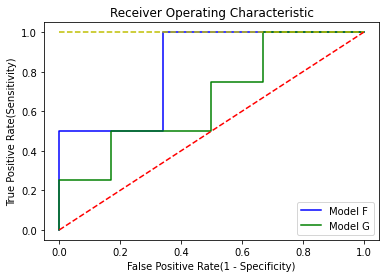

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G')
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_roc_1.png)

여기서 노란점선이 이상적인 모델을 표시한 것입니다. 임계값과 상관없이 민감도와 특이도가 100%일때를 말하고, AUC 값은 1입니다. 빨간점선은 기준선으로서 AUC 값이 0.5입니다. 개발한 모델을 사용하려면, 적어도 이 기준선보다는 상위에 있어야 되겠죠? 모델 F와 모델 G를 비교해보면, 모델 F가 모델 G보다 상위에 있음을 알 수 있습니다. AUC를 보더라도 모델 F가 면적이 더 넓습니다. sklearn 패키지는 ROC curve 및 AUC를 좀 더 쉽게 구할 수 있는 함수를 제공합니다. 임계값 변화에 따른 민감도, 특이도를 계산해서 입력할 필요없이, 클래스 값과 모델에서 나오는 클래스 확률 값을 그대로 입력하면, ROC curve를 그릴 수 있는 값과 AUC 값을 알려줍니다. sklearn 패키지를 이용한 소스코드는 다음과 같습니다.

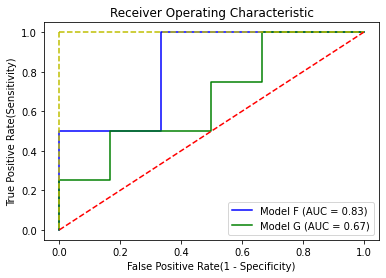

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,0],[1,0],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

![classification](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_roc_2.png)

---

### 검출 및 검색 하기

첫번째 문제를 보셨다면 두번째 문제로 넘어가봅니다.

    아래 블록 중 상단 돌기의 수가 하나인 것만 골라 왼쪽으로 놔두세요.
    
첫번째 문제랑 비슷하지만 더 쉬운 문제죠? 아래 블록 중에 하나인 것은 몇 개 일까요?

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_object_detection_1.jpg)

정답은 4개 입니다. 앞 예제와 동일하게 색상은 쉽게 구분이 되도록 맞춘 것뿐이니 신경쓰지 않으셔도 됩니다. 우리가 평가할 모델이 여섯 개이고, 각 모델의 결과가 다음과 같다고 가정해봅시다.

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_object_detection_2.png)

어떤 모델의 결과가 가장 좋을까요? 정답은 A모델입니다. 하나인 블록을 모두 골랐습니다. 각 모델 결과도 살펴보겠습니다.

- B모델 : 하나인 것을 모두 골랐지만 아닌 것도 있음
- C모델 : 모두 하나인 것이라고 고름
- D모델 : 하나인 것이라고 고른 것 중 진짜 하나인 것은 없음
- E모델 : 하나라고 고른 것은 모두 진짜이나 하나인 것을 모두 고르지는 못함
- F모델 : 하나인 것을 모두 고르지 못했고, 고른 것들에도 진짜가 아닌 것도 있음

A모델과 B모델 중 어느 것이 좋을까요? B모델도 전체 양성 5개 중 5개를 모두 골랐습니다만 하나가 아닌 것들도 골랐습니다. 이를 구분하기 위한 기준으로 `정밀도`라는 것을 사용합니다.

#### 정밀도

정밀도는 모델이 얼마나 정밀한가?입니다. 즉 진짜 양성만을 잘 고를 수록 정밀도가 높습니다.

    정밀도 = 실제 양성 수 / 양성이라고 판정한 수

그럼 각 모델에 대해서 정밀도를 계산해보겠습니다.

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_object_detection_3.png)

A모델은 5개 고른 것 중 실제 양성이 5개이므로 정밀도가 100%이고, B모델은 10개 고른 것 중 실제 양성이 5개이므로 정밀도는 50%가 됩니다. E모델은 A모델와 같이 정밀도가 100%이지만 E모델에서 양성을 모두 검출하지는 못했습니다. E모델보다 A모델이 더 좋은 성능을 가지고 있지만 정밀도만으로는 성능 차이를 나타낼 수 없습니다. 이를 나타내기 위해 `재현율`이라는 기준을 사용합니다.

#### 재현율

재현율은 양성인 것을 놓치지 않고 골라내는가?입니다. 양성을 많이 고를수록 재현율이 높습니다.

    재현율 = 검출 양성 수 / 전체 양성 수

그럼 각 모델의 재현율을 계산해보겠습니다.

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_object_detection_4.png)

앞서 본 E모델의 재현율은 전체 양성 5개 중에 2개만 검출하였으므로 40%입니다. F모델도 전체 양성 5개 중 2개만 검출하였으므로 재현율은 똑같이 40%입니다만 하지만 정밀도에서 차이가 납니다. 두 개의 모델만 비교한다면 E모델이 F모델보다 정밀도가 높으므로 더 좋은 성능을 가졌다고 볼 수 있습니다. 또 하나 짚고 넘어가야 할 것이 C모델입니다. 재현율은 양성을 얼마나 잘 검출하는가를 평가하는 것이기에 모두 양성이라고 하는 C모델인 경우에도 100% 재현율을 가지게 됩니다.

지금까지 본 모델을 표로 비교해보겠습니다.

|구분|모델 A|모델 B|모델 C|모델 D|모델 E|모델 F|
|:-:|-:|-:|-:|-:|-:|-:|
|총 검출 수|5개|10개|15개|5개|2개|5개|
|맞춘 양성 수(전체 5개)|5개|5개|5개|0개|2개|2개|
|정밀도|100%|50%|33%|0%|100%|40%|
|재현율|100%|100%|100%|0%|40%|40%|

검출 문제는 분류 문제와 어떤 차이가 있을까요? 이미 눈치채신 분도 계시겠지만,

    검출 문제에서는 검출되지 않은 진짜 음성에 대해서는 관심이 없습니다.

초등학교 소풍가서 하던 보물찾기 게임을 예를 들어 복습을 해보겠습니다. 우리 고생하시는 선생님들이 보물 10개를 숨겨두었다고 가정해보겠습니다.

- 철수는 보물을 5개가지고 왔는데, 모두 보물이었습니다. > 정밀도 100%, 재현율 50%
- 영희는 보물이라고 100개를 가지고 왔는데, 그 중 보물은 하나였습니다. > 정밀도 1%, 재현율 10%

#### 좀 더 살펴보기

앞서 언급한 것과 같이 각 블록을 판정할 때는 통상적으로 모델에서는 한개짜리 블록일 확률로 나오고, 이 확률값으로 판정을 하는데, 판정 기준을 `임계값(threshold)`이라고 불렀습니다. 지금까지 위에서 봤던 결과들은 모두 확률값을 임계값을 기준으로 판정을 한 것입니다. F모델과 동일하게 정밀도 40%, 재현율 40%을 가진 G모델이 있다고 가정해봅시다. F모델과 G모델의 판정결과 이전에 확률값을 오름차순으로 나열한 뒤 10% 단위로 표시된 칸에 배치를 해봤습니다.

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_object_detection_5.png)

F모델의 판정 기준인 임계값을 10% 단위로 변화시키면서 바뀌는 정밀도와 재현율을 표로 정리하면 다음과 같습니다.

|상단 돌기가 하나인 블록 임계값|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
|:-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|총 검출 수|15개|13개|11개|9개|7개|5개|3개|2개|2개|1개|0개|
|맞춘 양성 수(전체 5개)|5개|5개|5개|5개|4개|2개|2개|2개|2개|1개|0개|
|정밀도|33.3%|38.4%|45.4%|55.5%|57.1%|40%|66.6%|100%|100%|100%|0%|
|재현율|100%|100%|100%|100%|80%|40%|40%|40%|40%|20%|0%|

G모델도 정리하면 다음과 같습니다.

|상단 돌기가 하나인 블록 임계값|0%|10%|20%|30%|40%|50%|60%|70%|80%|90%|100%|
|:-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|
|총 검출 수|15개|13개|11개|8개|6개|5개|3개|2개|1개|1개|0개|
|맞춘 양성 수(전체 5개)|5개|5개|4개|3개|2개|2개|1개|1개|1개|1개|0개|
|정밀도|33.3%|38.4%|36.3%|37.5%|33.3%|40%|33.3%|50%|100%|100%|0%|
|재현율|100%|100%|80%|60%|40%|40%|20%|20%|20%|20%|0%|

어떤 모델이 더 좋을까요? 검출 문제에서 이런 패턴을 보기 위해 사용되는 것이 `Precision-Recall Graph` 입니다. 이 그래프는 x축을 재현율로 y축을 정밀도로 두어 이차원 평면 상에 결과를 표시한 것입니다. 아래는 이러한 그래프를 그리기 위한 소스코드입니다.

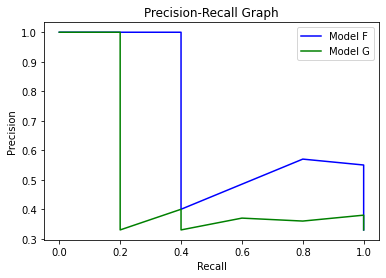

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')
plt.plot(recall_G, precision_G, 'g', label = 'Model G')

plt.legend(loc='upper right')
plt.show()

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_prg_1.png)

이러한 그래프를 하나의 수치로 나타낸 것이 `AP(Average Precision)`이라고 합니다. 이는 각 재현율에 해당하는 정밀도을 더해서 평균을 취한 것입니다. sklearn 패키지는 Precision-Recall Graph 및 AP를 좀 더 쉽게 구할 수 있는 함수를 제공합니다. 임계값 변화에 따른 정밀도, 재현율을 계산해서 입력할 필요없이, 클래스 값과 모델에서 나오는 클래스 확률 값을 그대로 입력하면 됩니다. sklearn 패키지를 이용한 소스코드는 다음과 같습니다.

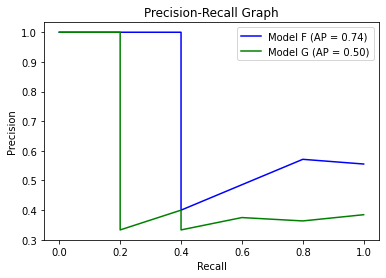

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)

plt.legend(loc='upper right')
plt.show()

![detection](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_prg_2.png)

F모델이 G모델보다 AP 수치가 높으므로 더 좋은 모델이라고 볼 수 있습니다.

---

### 분할하기

마지막 문제입니다.

    아래 사진의 Ground Truth을 보고 똑같이 만들어보세요. 즉 전체 영역에서 녹색블록과 노란블록을 구분해보세요.
    
역시 어린아이들도 쉽게 풀 수 있는 문제입니다. 실제로는 거의 Ground Truth처럼 만들겠지만, A~E모델처럼 다양한 결과가 나왔다고 가정해봅시다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_1.png)

어느 모델의 결과가 가장 좋을까요? 가장 쉽게 `픽셀 정확도(Pixel Accuracy)`를 가지고 판단할 수 있습니다. 픽셀은 이미지 처리에서 나오는 용어지만 여기서는 블록 하나라고 쳐봅십니다. 여기서 다루는 클래스는 녹색과 노란색으로 두 개입니다.

    Pixel Accuracy = (녹색 블록 맞춘 수 + 노란색 블록 맞춘 수) / 전체 블록 수
    
그럼 각 모델의 픽셀 정확도를 계산해보겠습니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_2.png)

단순히 맞춘 개수를 보고 계산하기 때문에 서로 다른 패턴이라도 동일 정확도로 나오는 경우가 많습니다. E모델은 녹색 블록이 하나도 없는데도 83.3%이나 결과가 나옵니다. 색상별로 어느정도 맞춰야 좋은 평가를 얻게 되려면 어떻게 해야할 까요? 클래스 별로 픽셀 정확도를 계산하는 방법인 `평균 정확도(Mean Accuracy)`가 있습니다. 이는 색상별로 픽셀 정확도를 계산하여 평균을 구한 값입니다.

    Mean Accuracy = (녹색 블록 맞춘 수 / 전체 녹색 블록 수 + 노란색 블록 맞춘 수 / 전체 노란색 블록 수) / 2
    
위 식에서 2는 색상 수 즉 클래스 수입니다. 그럼 각 모델 결과에 대해서 Mean Accuracy를 구해봤습니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_3.png)

앞서 봤던 E모델은 가장 낮은 평가를 받았습니다. 노란색 블록의 픽셀 정확도는 100%이지만 녹색 블록의 픽셀 정확도 0%이기 때문에 평균인 50%가 되었습니다. A모델과 C모델이 상대적으로 높은 평가를 받았습니다. 녹색 블록의 비중이 낮지만 픽셀 정확도는 100%이기 때문에 전체 평균값이 올라갔습니다. C모델인 경우에는 노란색 블록이 많이 틀렸음에도 80%나 되는 평가를 받았습니다. 이러한 정확도는 맞춘 개수만 카운팅이 되고 틀린 개수에 대한 패널티가 없기 때문입니다. 그럼 틀린 블록에 대한 패널티는 어떻게 고려할까요? 이를 고려한 평가방법으로 `MeanIU`라는 것이 있습니다.

IU는 Intersection over Union의 약자로 특정 색상에서의 실제 블록과 예측 블록 간의 합집합 영역 대비 교집합 영역의 비율입니다. MeanIU는 색상별로 구한 IU의 평균값을 취한 것입니다.

    Mean IU = (녹색 블록 IU + 노란색 블록 IU) / 2
    
각 모델의 결과에 대해 Mean IU을 계산해보겠습니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_4.png)

IU 개념에 대해서 조금 더 살펴보겠습니다. D모델을 예를 들어, 아래 그림을 보시면 Ground Truth의 녹색 블록 영역과 모델 결과 녹색 블록 영역에서 서로 겹치는 블록 수가 2개이고, 서로 합한 영역의 블록 수가 6개이기 때문에, 녹색 블록 IU는 2/6입니다. 노란색 블록 IU는 18/22입니다. 따라서 Mean IU는 이를 평균 취한 57.5%가 됩니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_7.png)

Pixel Accuracy와 Mean Accuracy인 경우에는 틀린 블록에 대한 고려가 없었지만, Mean IU인 경우에는 틀린 블록 수가 많을 수록 분모가 커지기 때문에 전체 수치는 낮아집니다. 클래스별로 IU를 구한 뒤 평균을 취하기 때문에 비중이 낮은 클래스라도 IU 수치가 낮으면 Mean IU 값도 떨어집니다. 만약 클래스별로 픽셀 수가 다를 경우 픽셀 수가 많은 클래스에 더 비중을 주고 싶다면 `Frequency Weighted IU`를 사용합니다. 각 모델별로 Frequency Weighted IU를 계산하면 아래와 같습니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_5.png)

앞서 살펴본 4가지 평가 기준에 대해서 정리해봤습니다.

![segmentation](http://tykimos.github.io/warehouse/2017-5-22-Evaluation_Talk_segmentation_6.png)

각 평가 기준이 나타내는 의미와 모델 결과별 수치를 보면서 왜 이런 결과가 나오게 되었는 지 의미적으로 해석해보시는 것이 다양한 평가 기준을 이해하는 데 도움이 많이 될 것 같습니다.

---

### 요약

분류, 검출 및 검색, 분할 문제를 정의해보고, 임의의 모델의 결과를 기초적인 기준 몇가지로 평가해봤습니다. 딥러닝 모델을 기존 도메인에 적용하기 위해서는 아무리 강조해도 지나침이 없는 것이 `평가`인 것 같습니다. 도메인마다 사용하는 용어도 다르고 평가 기준도 다르지만, 왜 그런 평가 기준이 나왔는 지에 대해서 곰곰히 생각해보고 차근차근 계산해보면서 이해하면, 딥러닝 모델의 실무 적용에 큰 도움이 될 것입니다.